In [1]:
# Libraries Import
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# Basic Analysis
import math
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from mpl_toolkits.mplot3d import Axes3D
import altair as alt

In [2]:
# Loading dataset
dataset = pd.read_csv("Data/supermarket_sales.csv")

dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
# Convert 'Date' column to datetime format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Convert 'Time' column to datetime and extract the hour
dataset['Time'] = pd.to_datetime(dataset['Time'], format='%H:%M').dt.hour

In [4]:
dataset.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   int32         
 12  Payment                  1000 non-n

## **Univariate Analysis**

In [7]:
# Identify numerical and categorical columns
numerical_columns = dataset.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = dataset.select_dtypes(include=['object']).columns

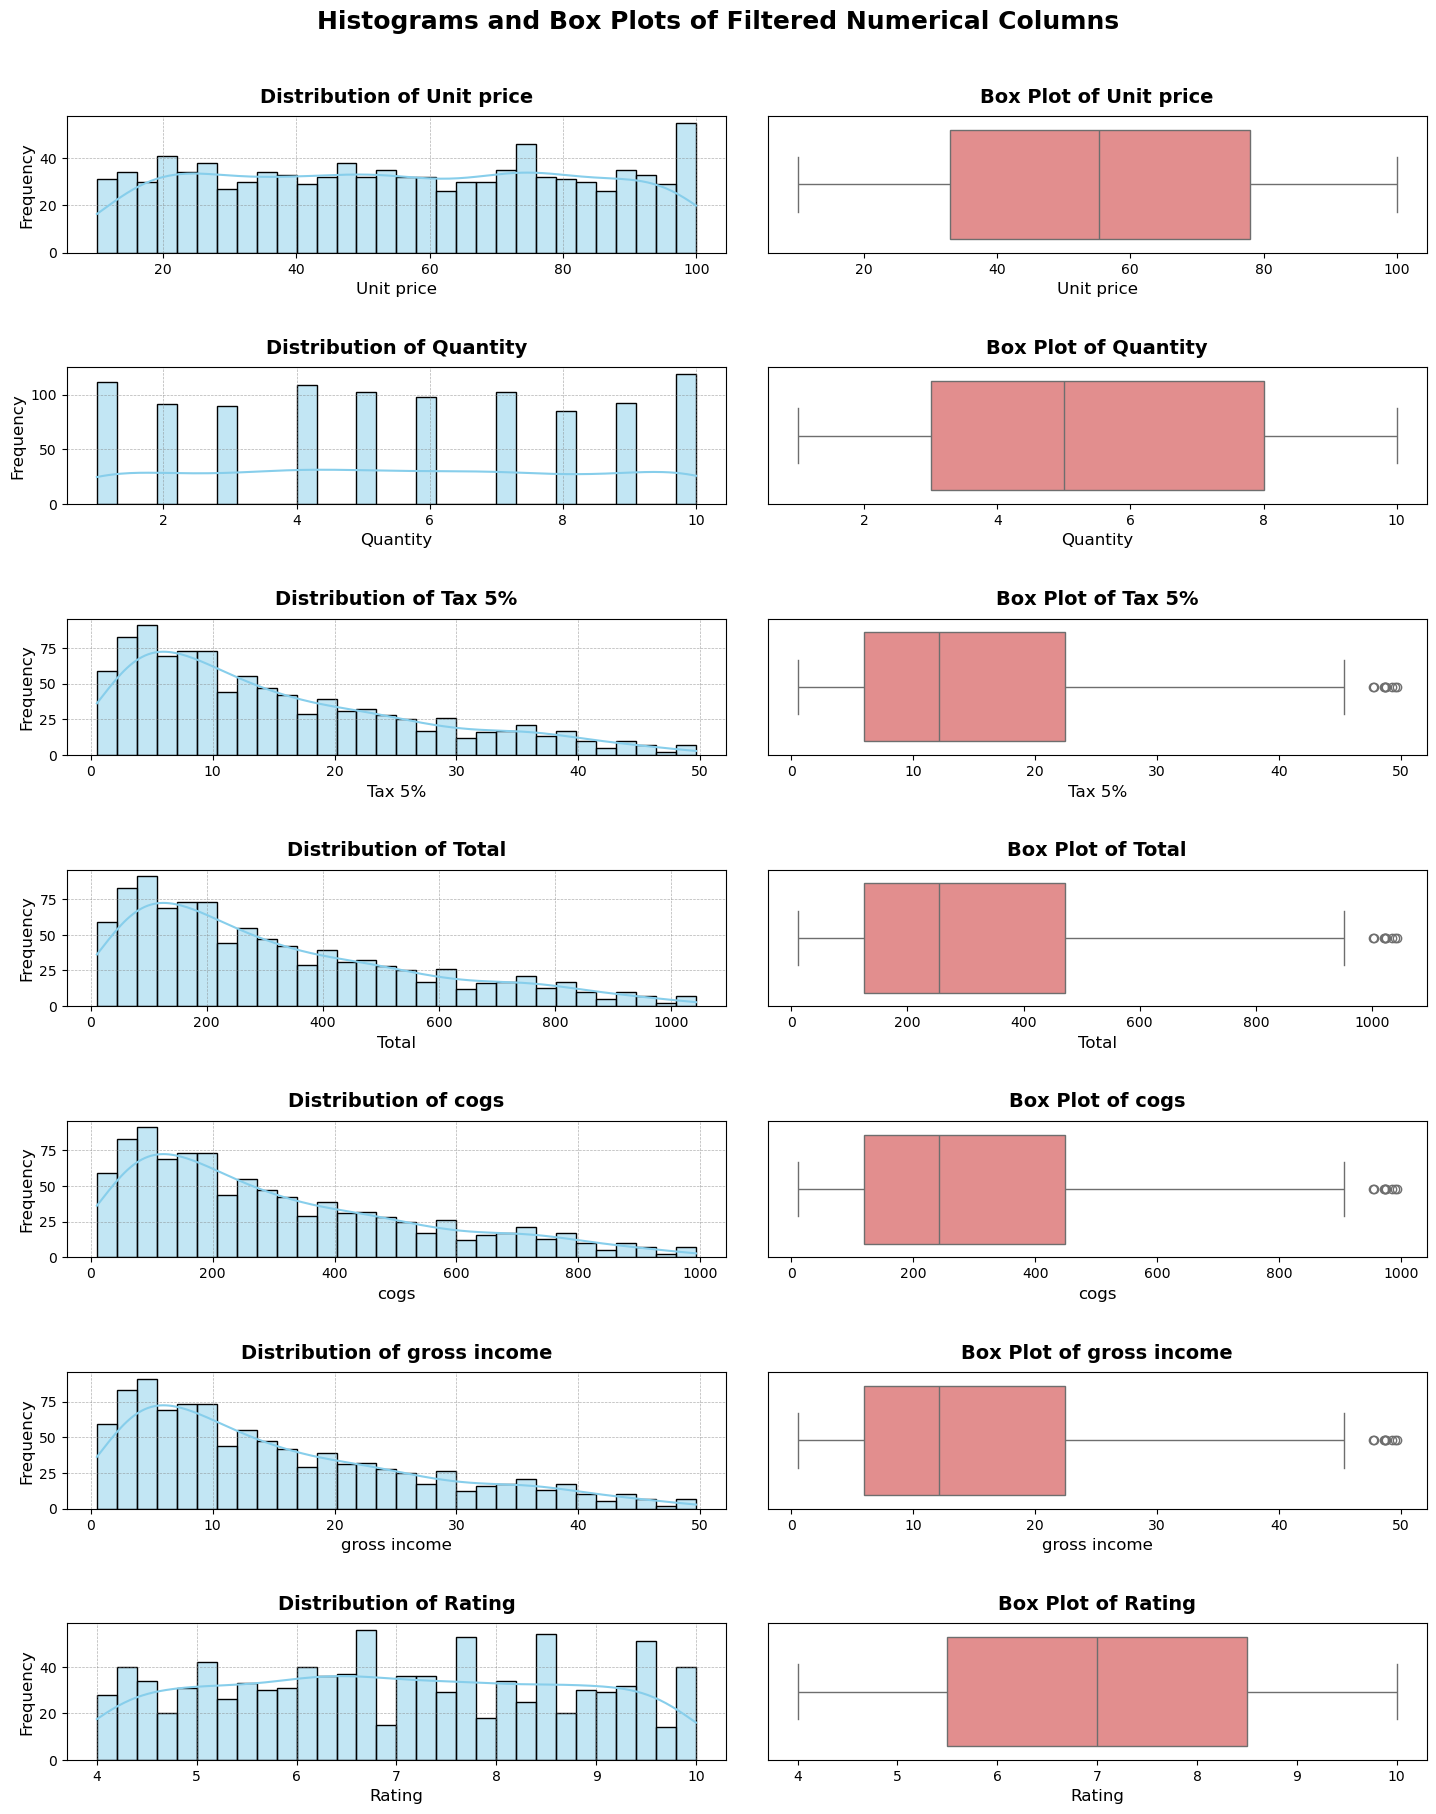

In [8]:
# Filter numerical columns, excluding specific ones
filtered_numerical_columns = [
    col for col in numerical_columns if col not in ['gross margin percentage']
]

# Summary statistics for filtered numerical columns
numerical_summary = dataset[filtered_numerical_columns].describe()

# Dynamically calculate rows for subplots (2 plots per column: histogram + box plot)
num_cols = 2  # Histogram and box plot per row
num_rows = len(filtered_numerical_columns)  # One row per numerical column

# Create figure and axes
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 18))

# Plot histograms and box plots for filtered numerical columns
for i, col in enumerate(filtered_numerical_columns):
    sns.histplot(dataset[col], kde=True, color='skyblue', bins=30, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {col}', fontsize=14, fontweight='bold', pad=10)
    axes[i, 0].set_xlabel(col, fontsize=12)
    axes[i, 0].set_ylabel('Frequency', fontsize=12)
    axes[i, 0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

    sns.boxplot(x=dataset[col], color='lightcoral', ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold', pad=10)
    axes[i, 1].set_xlabel(col, fontsize=12)
    axes[i, 1].set_yticks([])

# Adjust layout and display
plt.tight_layout(pad=3.0)
plt.suptitle("Histograms and Box Plots of Filtered Numerical Columns", fontsize=18, fontweight='bold', y=1.02)
plt.show()

### **Observations:**
* Unit Price and Total have significant variation, which could indicate different pricing and sales behavior for different product lines.
* Rating is generally positive, as the median is above 7.

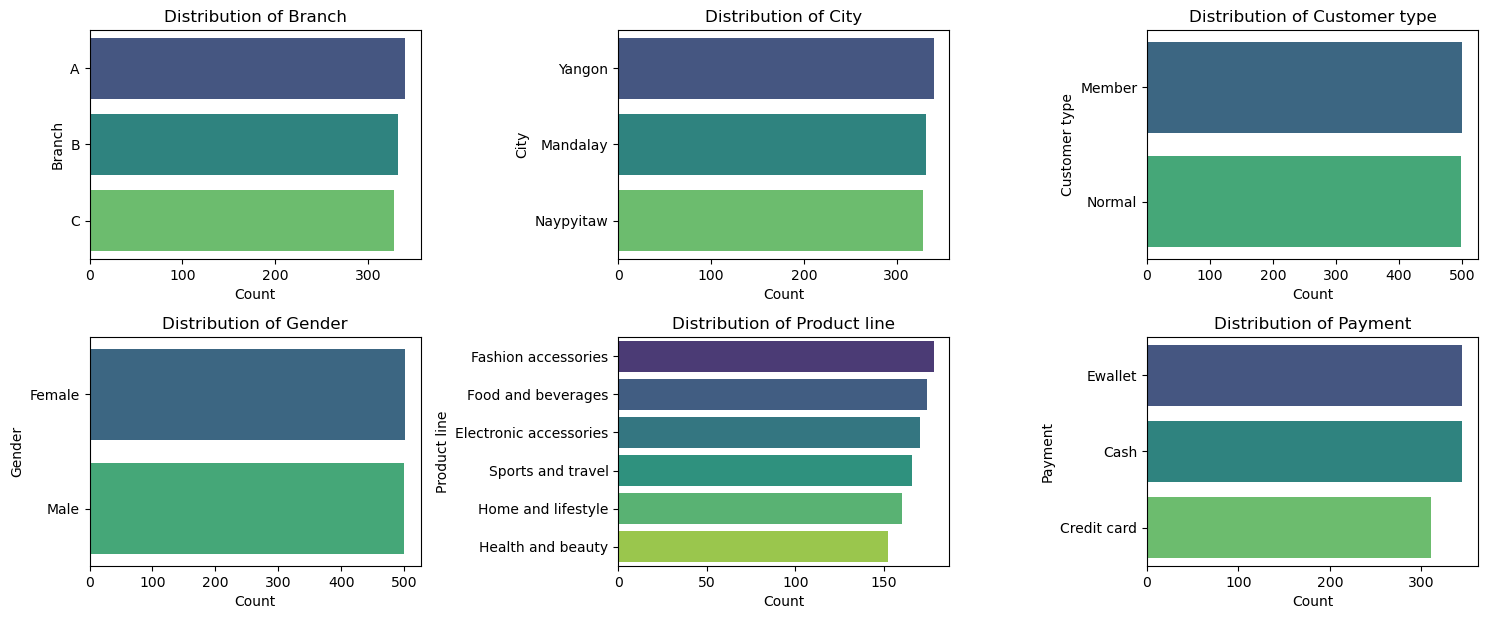

In [10]:
# Remove 'Invoice ID', 'Date', and 'Time' from categorical columns for further analysis
filtered_categorical_columns = [col for col in categorical_columns if col not in ['Invoice ID', 'Date', 'Time']]

# Summary statistics for categorical columns
categorical_summary = dataset[filtered_categorical_columns].nunique()

# Plot bar charts for filtered categorical columns
plt.figure(figsize=(15, 12))
for i, col in enumerate(filtered_categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(y=dataset[col], order=dataset[col].value_counts().index, palette="viridis")
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **Observations:**
* Branch and City distributions are uniform, as expected.
* Customer type and Gender show some variation; we can explore their proportions for further insights.
* **Product line** : Shows variety in offerings, making it a strong variable for product-specific analysis.
* **Payment** : Indicates customer preferences for specific payment methods.

## **Bivariate & Multivariate Analysis**

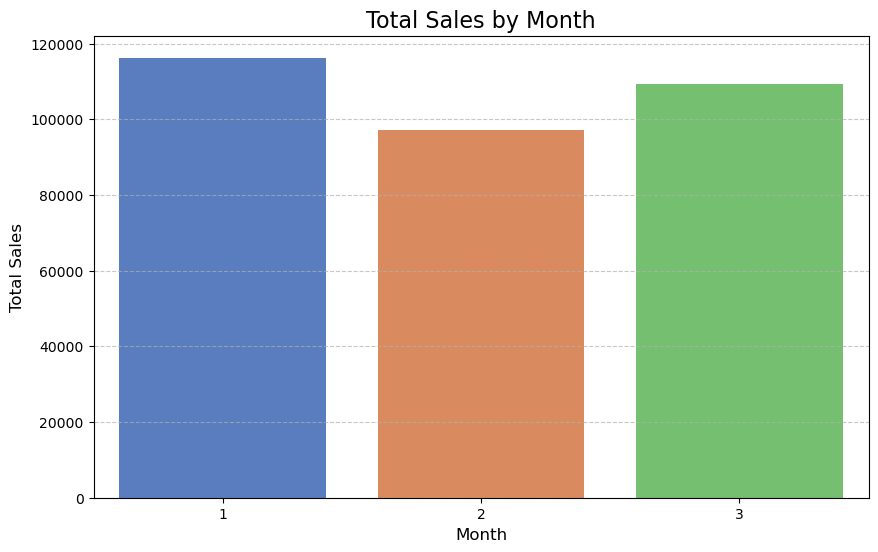

In [13]:
# Step 2: Extract the month from the Date column
dataset['Month'] = dataset['Date'].dt.month

# Step 3: Group sales by month
monthly_sales = dataset.groupby('Month')['Total'].sum().reset_index()

# Step 4: Visualize sales by month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Total', data=monthly_sales, palette='muted')
plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Observations:**

Visual analysis indicates that January experienced the highest sales volume, exceeding 1,10,754 units. This significant peak is likely attributable to seasonal factors such as New Year's discounts and promotional campaigns.

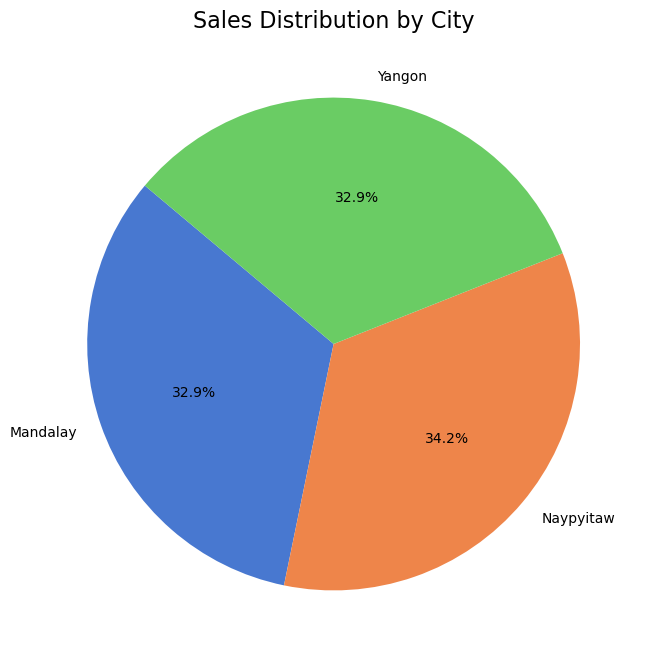

In [15]:
city_sales = dataset.groupby('City')['Total'].sum().reset_index()

# Pie chart for sales distribution by city
plt.figure(figsize=(8, 8))
plt.pie(city_sales['Total'], labels=city_sales['City'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('muted'))
plt.title('Sales Distribution by City', fontsize=16)
plt.show()

### **Observations:**

The highest sales volume was recorded in Naypyitaw, with a total of 105,303 sales. Notably, the sales figures in other cities are relatively comparable, with no significant disparity.

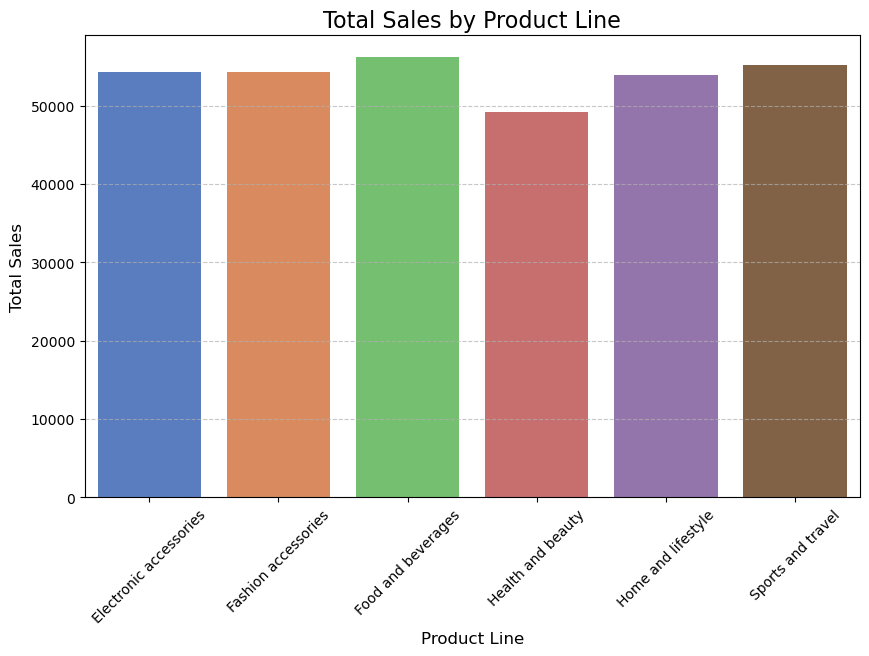

In [17]:
product_line_sales = dataset.groupby('Product line')['Total'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=product_line_sales, palette='muted')
plt.title('Total Sales by Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotating x-axis labels by 45 degrees
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Observations:**

An analysis of the bar chart indicates that food and beverages are the most popular product category in the supermarket, with significantly higher sales compared to other product lines. Conversely, the chart also suggests that health and beauty products garner relatively less interest among consumers.

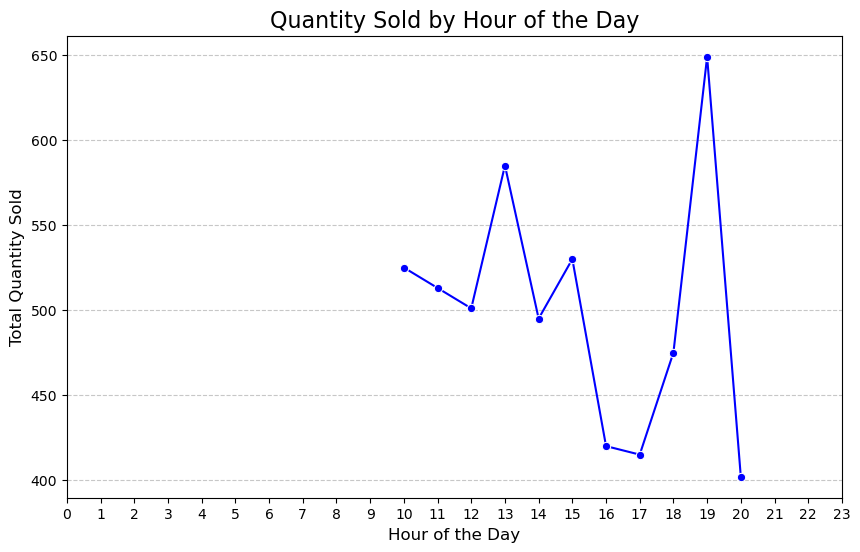

In [19]:
# Step 1: Group the data by Time and sum the Quantity
time_vs_quantity = dataset.groupby('Time')['Quantity'].sum().reset_index()

# Step 2: Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(x='Time', y='Quantity', data=time_vs_quantity, marker='o', color='blue')
plt.title('Quantity Sold by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Total Quantity Sold', fontsize=12)
plt.xticks(range(0, 24), fontsize=10)  # Ensure all hours are labeled
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Observations:**
  
According to the data, sales reach their peak between 6:00 pm and 7:00 pm, indicating this hour as the busiest period for sales.

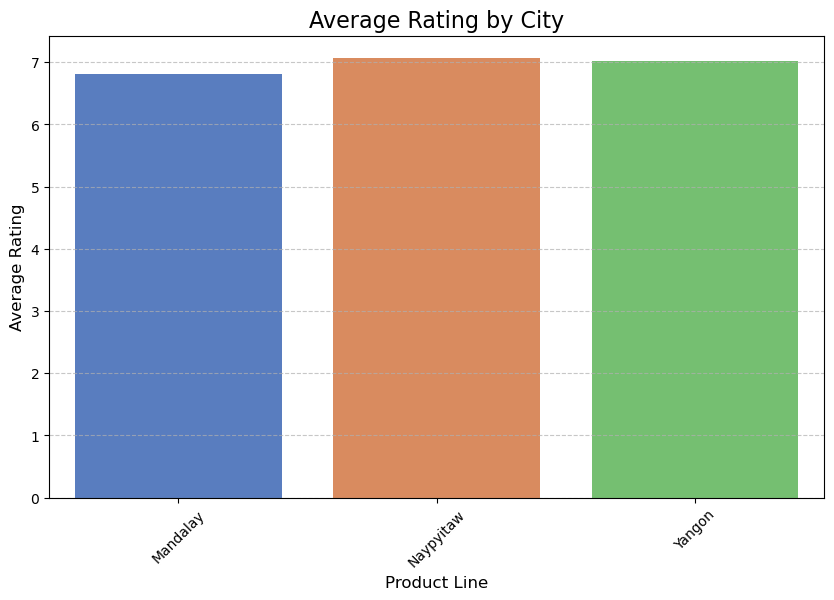

In [21]:
city_rating = dataset.groupby('City')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='City', y='Rating', data=city_rating, palette='muted')
plt.title('Average Rating by City', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotating x-axis labels by 45 degrees
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Observations:**

An analysis of the ratings reveals that Naypyitaw has the highest rating, surpassing Mandalay and Yangon, indicating a higher level of satisfaction or preference for Naypyitaw.

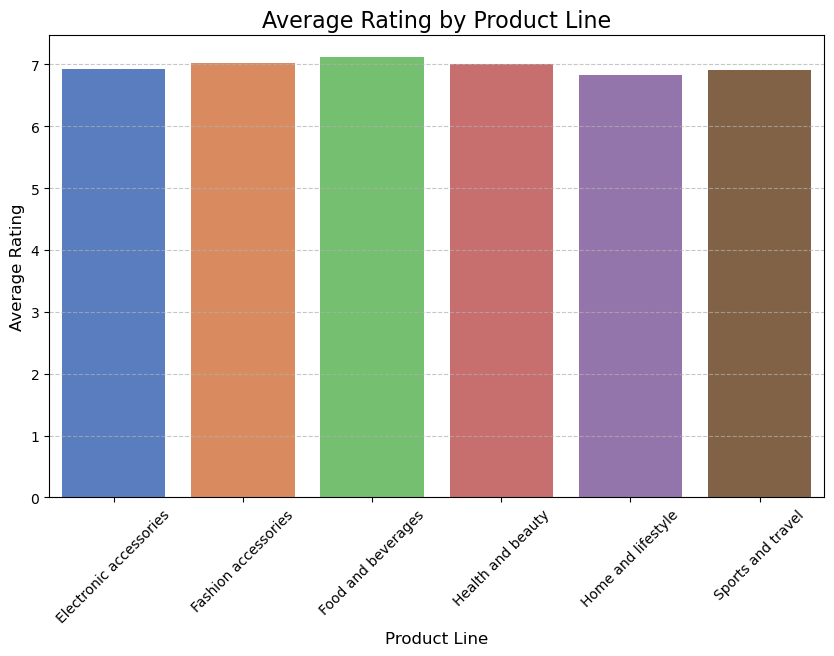

In [23]:
product_rating = dataset.groupby('Product line')['Rating'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Rating', data=product_rating, palette='muted')
plt.title('Average Rating by Product Line', fontsize=16)
plt.xlabel('Product Line', fontsize=12)
plt.ylabel('Average Rating', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotating x-axis labels by 45 degrees
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### **Observations:**

The ratings analysis reveals that:
* Food and Beverage has achieved the highest rating of 7.11.
* Home and Lifestyle has received the lowest rating of 6.83.

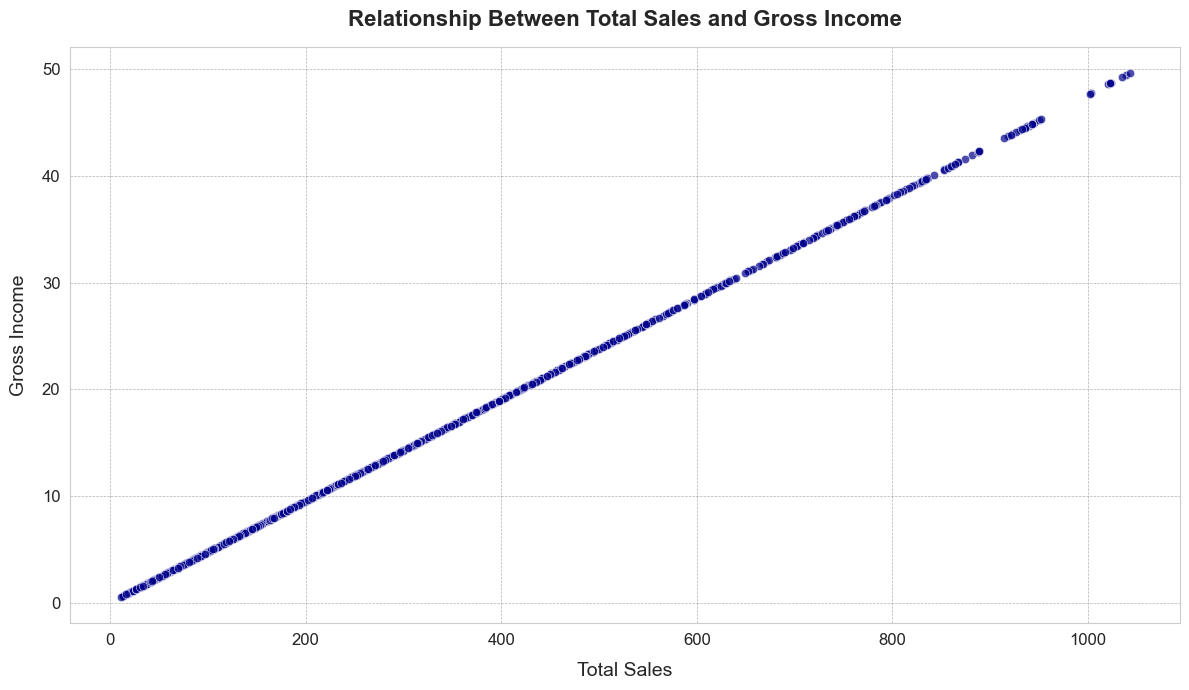

In [25]:
# Setting a professional style
sns.set_style("whitegrid")
plt.figure(figsize=(12, 7))

# Scatterplot
sns.scatterplot(
    data=dataset,
    x='Total',
    y='gross income',
    color='darkblue',  # A consistent and professional color
    alpha=0.7
)

# Titles and labels
plt.title('Relationship Between Total Sales and Gross Income', fontsize=16, fontweight='bold', pad=15)
plt.xlabel('Total Sales', fontsize=14, labelpad=10)
plt.ylabel('Gross Income', fontsize=14, labelpad=10)

# Customizing axes
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding grid
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.6)

# Tight layout and display
plt.tight_layout()
plt.show()

### **Observations:**

A positive correlation is observed between gross income and total sales, indicating that as total sales increase, gross income also tends to increase.

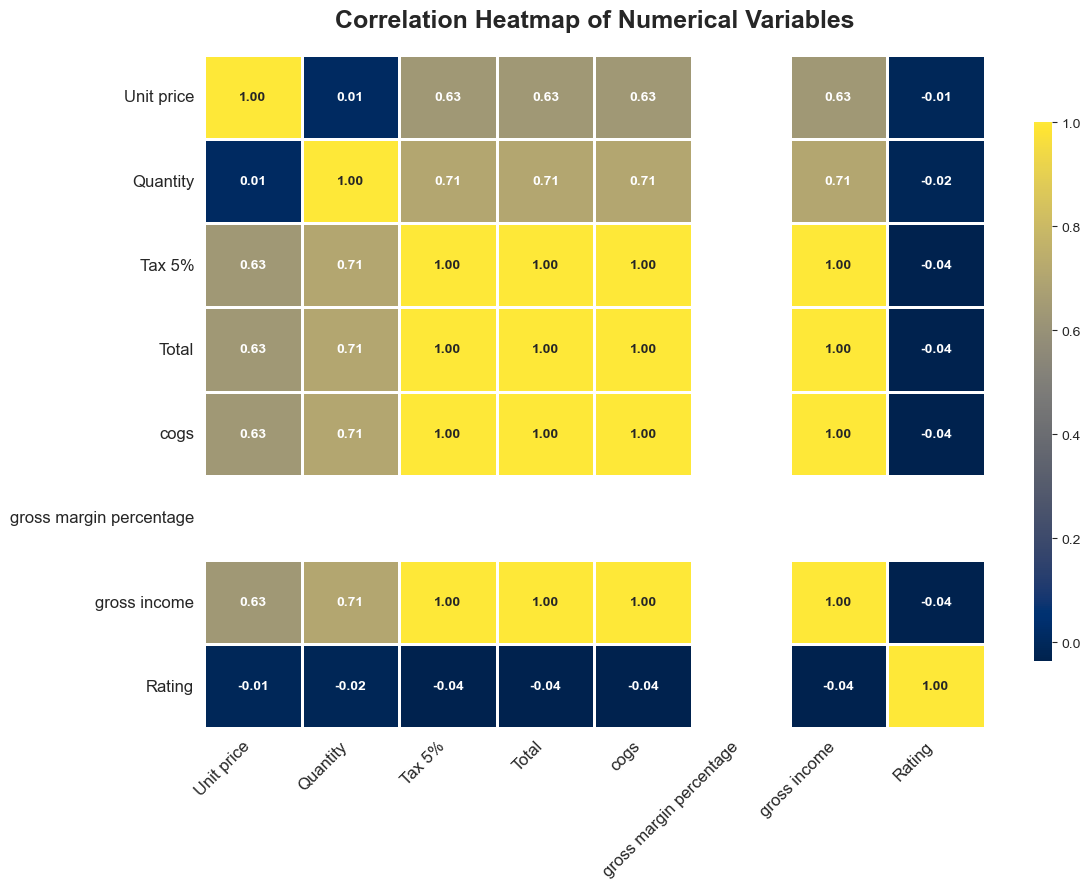

In [27]:
# Setting a professional style
sns.set_style("white")

# Compute correlation matrix
correlation = dataset[numerical_columns].corr()

# Create heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(
    correlation, 
    annot=True, 
    cmap='cividis',  # Professional and colorblind-friendly palette
    fmt=".2f", 
    linewidths=1, 
    linecolor='white',
    annot_kws={"size": 10, "fontweight": "bold"},  # Enhance annotation text
    cbar_kws={"shrink": 0.8, "aspect": 30}  # Customize color bar
)

# Titles and labels
plt.title('Correlation Heatmap of Numerical Variables', fontsize=18, fontweight='bold', pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")  # Rotate for better readability
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()

# Show plot
plt.show()

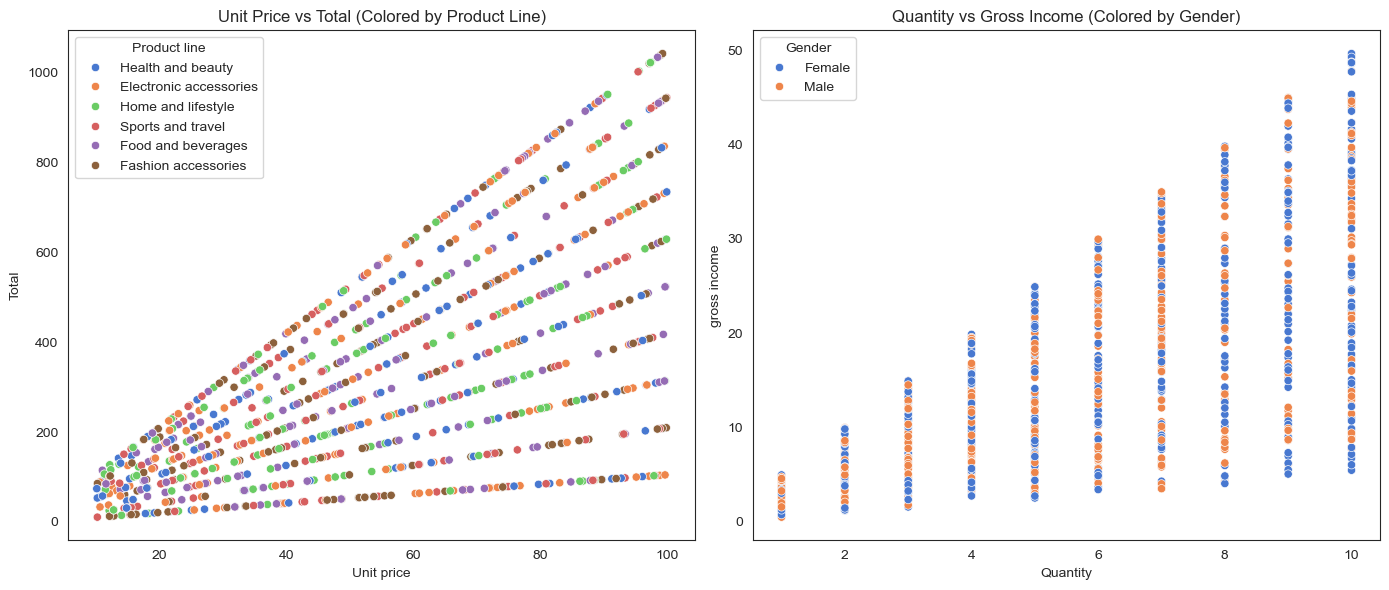

In [28]:
# Scatter plots: Unit price vs Total, Quantity vs gross income
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.scatterplot(x='Unit price', y='Total', data=dataset, hue='Product line', palette='muted', ax=axes[0])
axes[0].set_title('Unit Price vs Total (Colored by Product Line)')

sns.scatterplot(x='Quantity', y='gross income', data=dataset, hue='Gender', palette='muted', ax=axes[1])
axes[1].set_title('Quantity vs Gross Income (Colored by Gender)')

plt.tight_layout()
plt.show()

### **Observations:** 

A positive correlation is observed between:
* Total Sales and Unit Price, indicating that as unit price increases, total sales also tend to increase.
* Gross Income and Quantity, suggesting that as quantity sold increases, gross income also tends to increase.

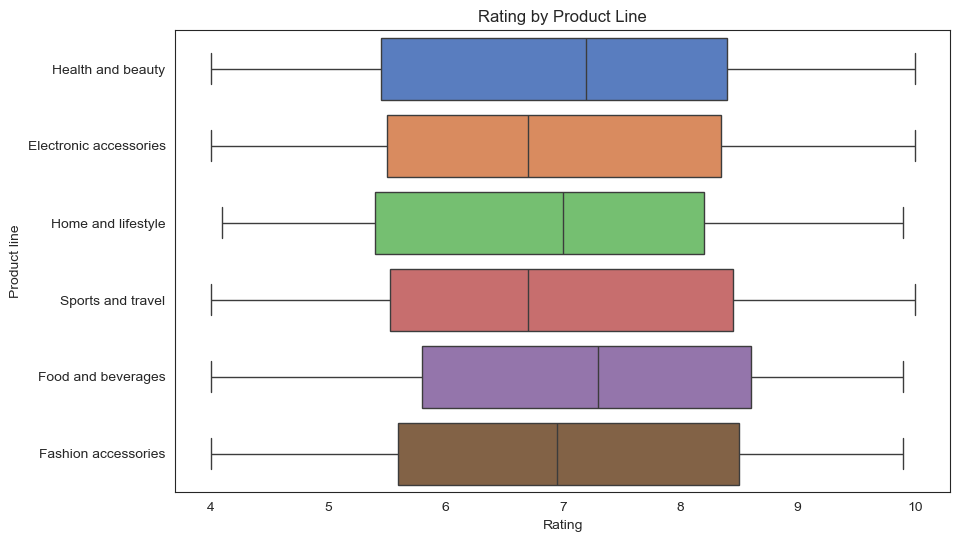

In [30]:
# Box plots: Rating by Product line
plt.figure(figsize=(10, 6))
sns.boxplot(x='Rating', y='Product line', data=dataset, palette='muted')
plt.title('Rating by Product Line')
plt.show()

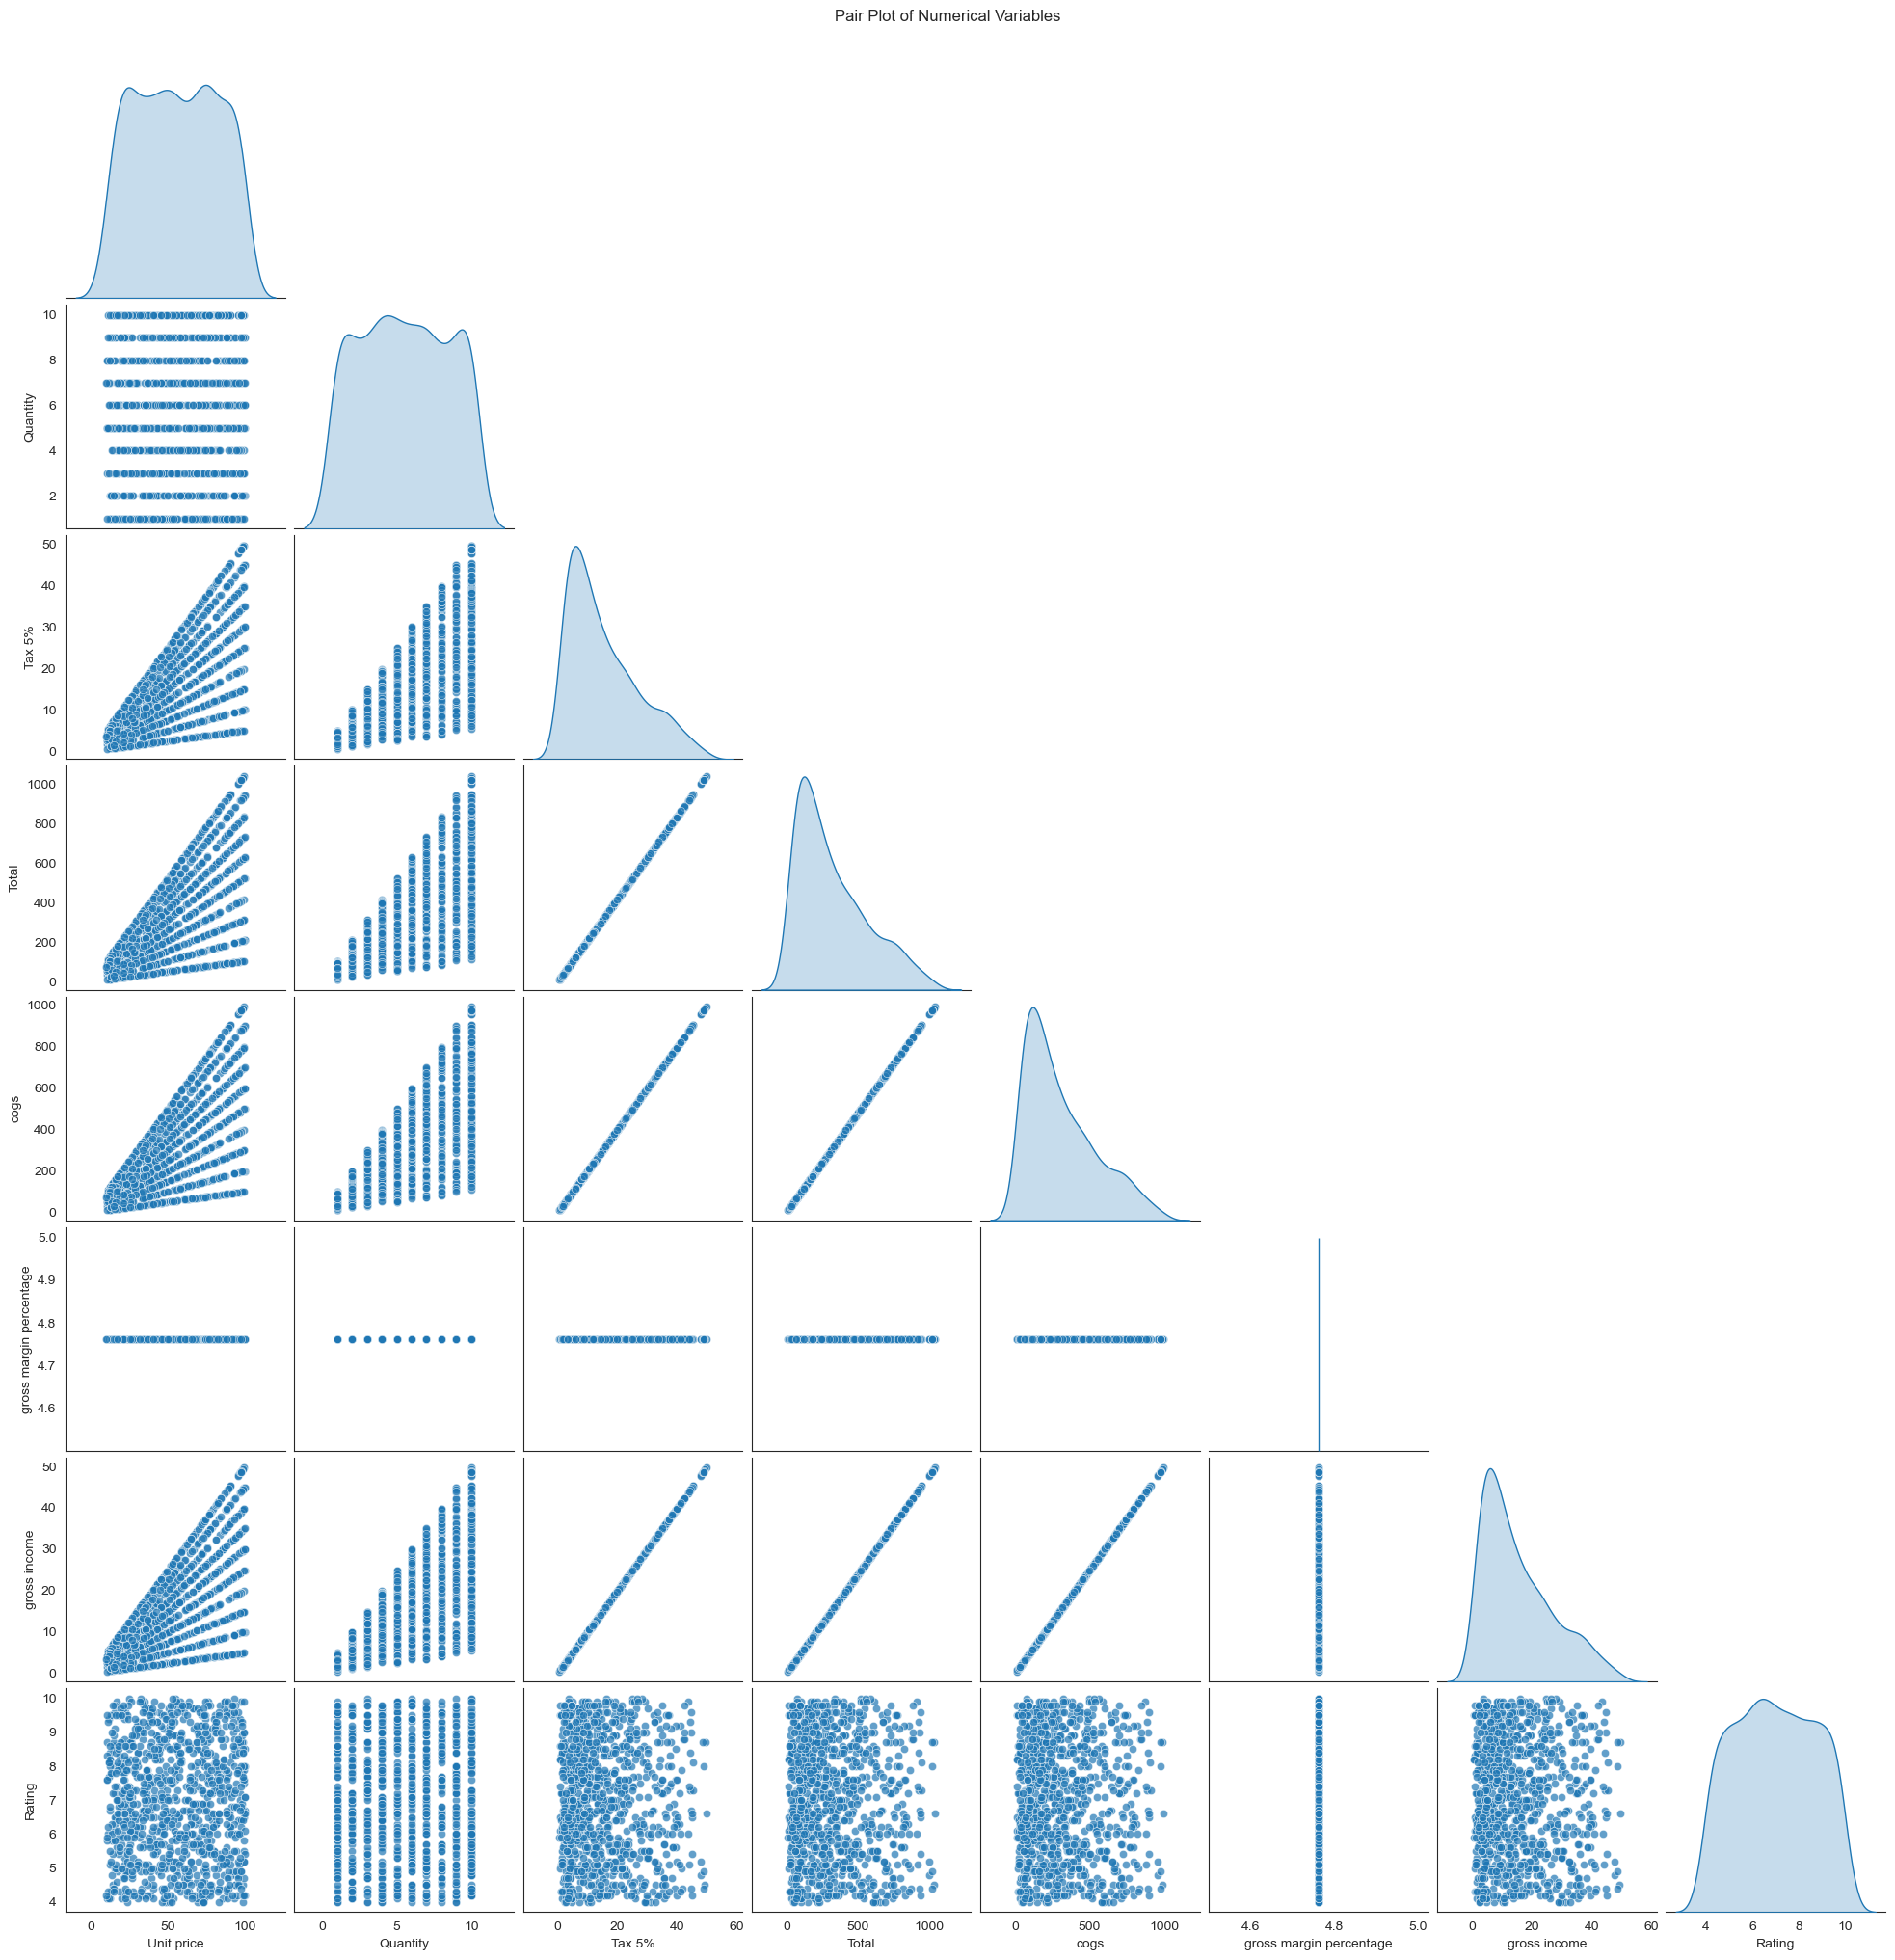

In [31]:
# Pair plots for numerical variables
sns.pairplot(dataset[numerical_columns], diag_kind='kde', corner=True, plot_kws={'alpha': 0.7})
plt.suptitle("Pair Plot of Numerical Variables", y=1.02)
plt.show()

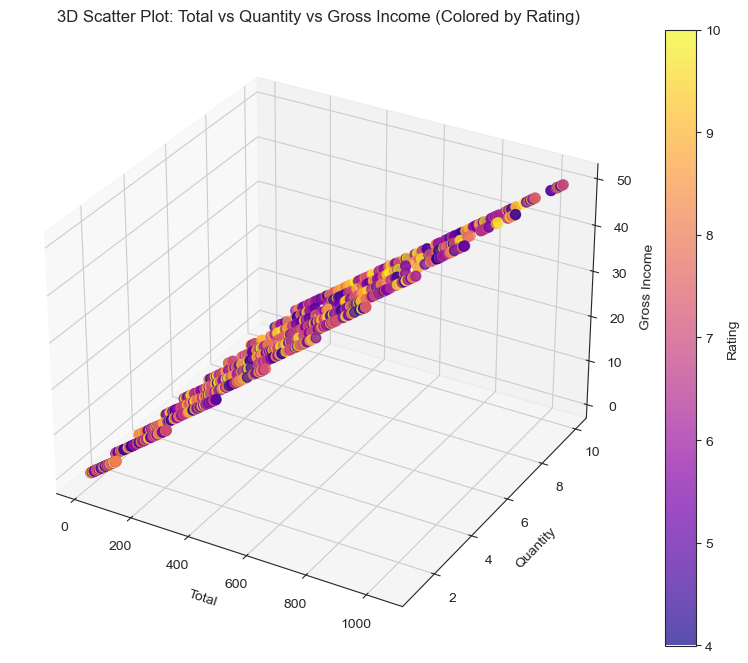

In [32]:
# 3D Scatter plot: Total, Quantity, gross income
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(dataset['Total'], dataset['Quantity'], dataset['gross income'], 
                c=dataset['Rating'], cmap='plasma', s=50, alpha=0.7)
ax.set_xlabel('Total')
ax.set_ylabel('Quantity')
ax.set_zlabel('Gross Income')
plt.title('3D Scatter Plot: Total vs Quantity vs Gross Income (Colored by Rating)')
plt.colorbar(sc, label='Rating')
plt.show()


# Executive Summary: Supermarket Sales Insights

Our comprehensive analysis of the supermarket sales data reveals valuable insights to inform business strategies and drive growth. Key findings include:

## Customer Behavior and Preferences
* Customers generally report a positive shopping experience, with a median rating above 7.
* Food and beverages are the most popular product category, while health and beauty products attract relatively less interest.
* Customers prefer shopping between 6:00 pm and 7:00 pm.

## Sales Performance and Trends
* January experienced the highest sales volume, likely due to seasonal factors like New Year's discounts and promotions.
* Naypyitaw leads in sales volume, with 105,303 sales, while other cities show relatively comparable figures.
* Total sales and gross income exhibit a positive correlation, indicating that increased sales drive higher gross income.

## Product Line Performance
* Food and Beverage achieved the highest customer rating (7.11), while Home and Lifestyle received the lowest rating (6.83).
* Product lines show significant variation in unit price and total sales, suggesting different pricing and sales strategies.

## Operational Insights
* A positive correlation exists between Total Sales and Unit Price, as well as between Gross Income and Quantity.
* These correlations suggest that strategic pricing and inventory management can drive sales and revenue growth.

# Recommendations

Based on these insights, we recommend:

## Off-Peak Hour Incentives
1. Provide a complimentary cold drink to customers who shop between 4:00 pm and 5:00 pm.
2. Offer exclusive discounts or loyalty rewards to customers who visit during off-peak hours.
3. Create a relaxing atmosphere during off-peak hours, such as offering soothing music or comfortable seating areas.

**Benefits:**
* Reduce congestion and wait times during peak hours
* Increase sales and revenue during traditionally slow periods
* Enhance the overall shopping experience for customers who prefer less crowded stores

## Product Line Optimization

**Key Steps:**
1. Identify Underperforming Product Lines
2. Analyze Pricing Strategies
3. Adjust Pricing Strategies
4. Monitor and Evaluate Performance

**Benefits:**
* Improved sales and revenue for underperforming product lines
* Enhanced competitiveness in the market
* Increased customer satisfaction and loyalty through optimized pricing strategies
* Better alignment of pricing strategies with business objectives and market conditions

## Inventory Management

**Key Initiatives:**
1. Conduct Inventory Analysis
2. Implement Just-In-Time (JIT) Replenishment
3. Optimize Reorder Points and Quantities
4. Implement Automated Inventory Tracking
5. Regularly Review and Adjust

**Benefits:**
* Reduced stockouts and improved product availability
* Minimized excess inventory and reduced waste
* Improved operational efficiency and reduced costs
* Enhanced customer satisfaction through improved product availability

## Health and Beauty Section Improvements

**Key Initiatives:**
1. Conduct Customer Feedback Analysis
2. Improve Product Display and Navigation
3. Provide Personalized Recommendations
4. Offer Sampling and Demonstrations
5. Implement Loyalty Program

**Benefits:**
* Improved customer satisfaction and loyalty
* Increased sales and revenue within the Health and Beauty section
* Enhanced customer engagement and retention
* Positive word-of-mouth and online reviews

In [34]:
# By implementing these strategies, the supermarket can optimize sales performance, enhance customer satisfaction, and drive business growth.